In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from pycocotools.coco import COCO
import pandas as pd
from data_viewer import get_img_mask

In [2]:
data_dir = './input/data'
json_file = 'train.json'

color_palette={
    '0':np.array([0,0,0]), # white
    '1':np.array([255,255,0]), # Yellow
    '2':np.array([0,255,0]), # Green
    '3':np.array([0,0,255]), # Blue
    '4':np.array([0,255,255]), # sky blue
    '5':np.array([255,0,255]), # pink
    '6':np.array([128,0,255]), # purple
    '7':np.array([128,128,128]), # gray
    '8':np.array([255,128,0]), # orange
    '9':np.array([0,255,128]), # light green
    '10':np.array([255,255,255]), # black
    '11':np.array([255,0,0]) # Red
    }

json_path = os.path.join(data_dir,json_file)
coco = COCO(json_path)
# Read annotations
with open(json_path, 'r') as f:
     dataset = json.loads(f.read())

categories = dataset['categories']
len_imgs = len(dataset['images'])
            
# Load categories and super categories
cat_names = []
for cat_it in categories:
    cat_names.append(cat_it['name'])
cat_color = ['Yellow', 'Green','Blue', 'sky' 'blue', 'pink', 'purple', 'gray', 'orange','light green', 'White','Red']

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Color': cat_color})

# background = 0 에 해당되는 label 추가 후 기존들을 모두 label + 1 로 설정
back_pd = pd.DataFrame(["Backgroud"], columns = ["Categories"])
df =back_pd.append( df,ignore_index=True)
category_names = list(df.Categories)

loading annotations into memory...
Done (t=2.38s)
creating index...
index created!


Color Table
        Categories        Color
0       Backgroud          NaN
1         UNKNOWN       Yellow
2   General trash        Green
3           Paper         Blue
4      Paper pack      skyblue
5           Metal         pink
6           Glass       purple
7         Plastic         gray
8       Styrofoam       orange
9     Plastic bag  light green
10        Battery        White
11       Clothing          Red
['General trash' 'Plastic bag']


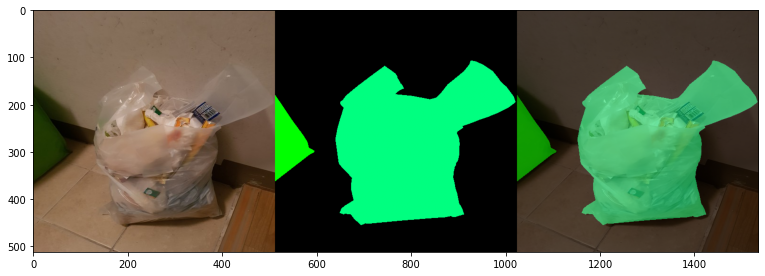

In [3]:
idx = 0
image, mask,clss = get_img_mask(idx,category_names,coco,data_dir)
mask= np.expand_dims(mask,-1)
mask = np.select([mask==i for i in range(12)],[color_palette[str(i)] for i in range(12)])
image,mask = image / 255, mask/255
img = np.concatenate([image,mask,image*0.5+mask*0.5],axis=1)

print("Color Table\n",df)
print(clss)
fig = plt.figure(figsize=(13,13))
plt.imshow(img)
plt.show()